In [1]:
import pandas as pd
import datetime as dt
import numpy as np
import matplotlib.pyplot as plt
from typing import Optional, Tuple
import os

pd.set_option("display.min_rows", 10)

# Get and Clean DF

In [2]:
quadro = r''

In [3]:
_dir = r"..\00_dados\0_dados_TR_DT_DC_PST_FP"
files = [file for file in os.listdir(_dir) if file.endswith(".csv")]
files

['dados_qgbt2_INPS0014.csv',
 'dados_qgbt3_INPS0013.csv',
 'dados_qgbt4_INPS0011.csv']

In [4]:
path = os.path.join(_dir, files[2])
path

'..\\00_dados\\0_dados_TR_DT_DC_PST_FP\\dados_qgbt4_INPS0011.csv'

In [5]:
df = pd.read_csv(path, sep=';', decimal=',', skiprows=37)
df = df.rename(columns={'DateTime': 'Tempo', 
                        'AVG_VL1[V][V]': 'Vab_avg', 'AVG_VL2[V][V]': 'Vbc_avg', 'AVG_VL3[V][V]': 'Vca_avg',
                        'MAX_VL1[V][V]': 'Vab_max', 'MAX_VL2[V][V]': 'Vbc_max', 'MAX_VL3[V][V]': 'Vca_max',
                        'MIN_VL1[V][V]': 'Vab_min', 'MIN_VL2[V][V]': 'Vbc_min', 'MIN_VL3[V][V]': 'Vca_min'})
df["Tempo"] = pd.to_datetime(df["Tempo"], format="%Y/%m/%d %H:%M:%S")
df2 = df[['Tempo', 'Vab_min', 'Vbc_min', 'Vca_min', 'Vab_avg', 'Vbc_avg', 'Vca_avg', 'Vab_max', 'Vbc_max', 'Vca_max']].copy()
df2

,Tempo,Vab_min,Vbc_min,Vca_min,Vab_avg,Vbc_avg,Vca_avg,Vab_max,Vbc_max,Vca_max
0,2023-02-08 14:56:52,384.3,384.5,387.0,387.9,391.5,393.7,389.6,393.4,395.9
1,2023-02-08 15:06:52,388.4,392.6,395.0,389.6,393.8,396.0,391.9,395.7,397.4
2,2023-02-08 15:16:52,390.7,394.5,396.5,392.2,395.7,397.7,393.8,396.8,399.0
3,2023-02-08 15:26:52,391.6,394.8,397.2,393.4,396.9,398.7,394.7,398.9,400.0
4,2023-02-08 15:36:52,393.5,397.3,398.8,395.4,399.4,401.0,396.4,400.4,402.2
...,...,...,...,...,...,...,...,...,...,...
1154,2023-02-16 15:16:52,387.4,391.2,392.3,389.0,392.6,393.7,389.8,394.0,394.9
1155,2023-02-16 15:26:52,388.6,391.6,393.1,390.6,393.8,395.6,393.1,396.0,398.1
1156,2023-02-16 15:36:52,391.6,395.5,396.1,393.1,397.5,398.1,394.7,399.6,399.7
1157,2023-02-16 15:46:52,390.3,395.1,396.7,393.7,398.4,398.9,394.9,399.3,400.3


In [6]:
(df == 0).sum()

No              0
Tempo           0
ELAPSED TIME    0
AVG_V1[V][V]    0
AVG_V2[V][V]    0
               ..
Pst3(1min)[]    0
Pst1[]          0
Pst2[]          0
Pst3[]          0
Unnamed: 75     0
Length: 76, dtype: int64

# Definição Parâmetros

In [7]:
class Horario:
    def __init__(self, h_dia, h_ponta, h_noite, h_madrugada):
        self.H_DIA = h_dia
        self.H_PONTA = h_ponta
        self.H_NOITE = h_noite
        self.H_MADRUGADA = h_madrugada

Dia_util = Horario(dt.time(7, 0, 0), dt.time(18, 0, 0), dt.time(21, 0, 0), dt.time(23, 59, 59))  # Horarios do dia útil

# Criar DF utilizado

In [8]:
dados_DT = df[0:1008].copy()
dados_DT['Dia_Semana'] = dados_DT['Tempo'].dt.weekday
dias_semana = {
    0: "Segunda-feira",
    1: "Terça-feira",
    2: "Quarta-feira",
    3: "Quinta-feira",
    4: "Sexta-feira",
    5: "Sábado",
    6: "Domingo"
}
dados_DT['Dia_Semana_PT_BR'] = dados_DT['Tempo'].dt.weekday.map(dias_semana)
########## Determina tipo de horário
dados_DT['Tipo_Hora'] = ['Dia' if (hora >= Dia_util.H_DIA) & (hora < Dia_util.H_PONTA) else
                         'Ponta' if (hora >= Dia_util.H_PONTA) & (hora < Dia_util.H_NOITE) else
                         'Noite' if (hora >= Dia_util.H_NOITE) & (hora < Dia_util.H_MADRUGADA) else
                         'Madrugada' for hora in dados_DT['Tempo'].dt.time]

dados_DT

,No,Tempo,ELAPSED TIME,AVG_V1[V][V],AVG_V2[V][V],AVG_V3[V][V],MAX_V1[V][V],MAX_V2[V][V],MAX_V3[V][V],MIN_V1[V][V],...,Pst1(1min)[],Pst2(1min)[],Pst3(1min)[],Pst1[],Pst2[],Pst3[],Unnamed: 75,Dia_Semana,Dia_Semana_PT_BR,Tipo_Hora
0,1,2023-02-08 14:56:52,00000:10:00,224.9,224.2,228.2,225.8,225.2,229.6,222.8,...,0.06115,0.14300,0.06618,0.3138,0.3082,0.6151,NaN,2,Quarta-feira,Dia
1,2,2023-02-08 15:06:52,00000:20:00,225.8,225.5,229.6,227.0,226.4,230.6,225.2,...,0.13370,0.24500,0.17770,0.1864,0.1972,0.1853,NaN,2,Quarta-feira,Dia
2,3,2023-02-08 15:16:52,00000:30:00,227.3,226.5,230.7,228.2,227.1,231.4,226.5,...,0.21320,0.21300,0.19970,0.1842,0.1883,0.1903,NaN,2,Quarta-feira,Dia
3,4,2023-02-08 15:26:52,00000:40:00,228.0,227.2,231.3,228.7,228.3,232.1,227.0,...,0.20410,0.22320,0.20110,0.2056,0.1972,0.1821,NaN,2,Quarta-feira,Dia
4,5,2023-02-08 15:36:52,00000:50:00,229.1,228.7,232.7,229.7,229.1,233.3,228.1,...,0.19880,0.23660,0.23960,0.1674,0.1788,0.1768,NaN,2,Quarta-feira,Dia
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1003,1004,2023-02-15 14:06:52,00167:20:00,223.1,222.3,226.5,223.7,223.1,227.1,221.3,...,0.28610,0.27970,0.27730,0.2212,0.2113,0.2169,NaN,2,Quarta-feira,Dia
1004,1005,2023-02-15 14:16:52,00167:30:00,223.0,222.1,226.4,223.6,222.8,227.2,222.5,...,0.11000,0.15590,0.06718,0.2149,0.2074,0.2126,NaN,2,Quarta-feira,Dia
1005,1006,2023-02-15 14:26:52,00167:40:00,223.6,222.5,226.9,224.3,223.2,227.5,222.6,...,0.09234,0.09903,0.24250,0.2092,0.2097,0.2122,NaN,2,Quarta-feira,Dia
1006,1007,2023-02-15 14:36:52,00167:50:00,223.4,222.3,226.7,223.9,222.9,227.0,222.8,...,0.15990,0.08425,0.11630,0.2087,0.2012,0.2124,NaN,2,Quarta-feira,Dia


# Gráfico Tensão

Text(0.5, 0, 'Samples')

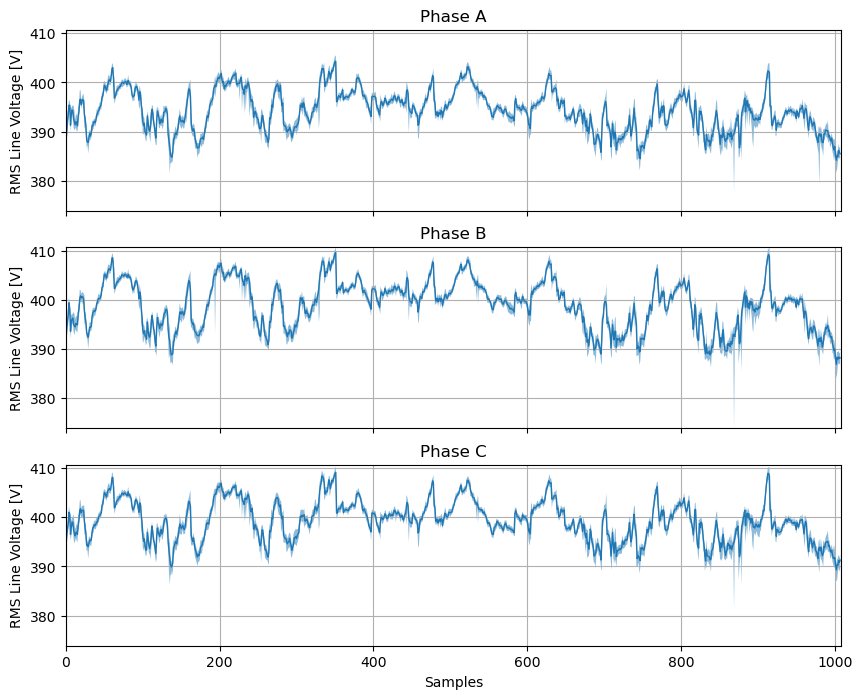

In [9]:
########## Gerar gráficos de tensão em regime permanente
Nsteps=1008
t=np.arange(Nsteps)
x=np.ones(Nsteps)

Y_grafico_max=max(max(dados_DT['Vab_max']),max(dados_DT['Vbc_max']),max(dados_DT['Vca_max']))
Y_grafico_min=min(min(dados_DT['Vab_min']),min(dados_DT['Vbc_min']),min(dados_DT['Vca_min']))

def edit_graf_tensao(grafico, V_max, V_min, V_avg, fase):
    grafico.grid(True)
    grafico.fill_between(t, V_max, V_min, alpha=.5, linewidth=0)
    grafico.plot(t, V_avg, linewidth=1)
    grafico.set_ylim([Y_grafico_min, Y_grafico_max])
    grafico.set_xlim([0, 1008])
    grafico.set_ylabel('RMS Line Voltage [V]')
    grafico.set_title(f'Phase {fase}')
    
fig, (ax1, ax2, ax3) = plt.subplots(nrows=3, ncols=1, sharex=True, figsize=(10, 8))
edit_graf_tensao(ax1, dados_DT['Vab_max'], dados_DT['Vab_min'], dados_DT['Vab_avg'], 'A')
edit_graf_tensao(ax2, dados_DT['Vbc_max'], dados_DT['Vbc_min'], dados_DT['Vbc_avg'], 'B')
edit_graf_tensao(ax3, dados_DT['Vca_max'], dados_DT['Vca_min'], dados_DT['Vca_avg'], 'C')
ax3.set_xlabel('Samples')

# Calculo Beta

<div style="font-size: 150%;">
$$
\beta=\frac{V_{ab}^{4}+V_{bc}^{4}+V_{ca}^{4}}
{\left(V_{ab}^{2}+V_{bc}^{2}+V_{ca}^{2}\right)^{2}}
$$
</div>


In [10]:
def add_beta_np(df, vab, vbc, vca, out):
    V = df[[vab, vbc, vca]].to_numpy(dtype=float)
    s2  = (V**2).sum(axis=1)
    num = (V**4).sum(axis=1)
    den = s2**2
    df[out] = np.divide(num, den, out=np.full_like(den, np.nan, dtype=float), where=den!=0)
    return df
    
dados_DT = add_beta_np(dados_DT, 'Vab_min', 'Vbc_min', 'Vca_min', 'beta_min')
dados_DT = add_beta_np(dados_DT, 'Vab_avg', 'Vbc_avg', 'Vca_avg', 'beta_avg')
dados_DT = add_beta_np(dados_DT, 'Vab_max', 'Vbc_max', 'Vca_max', 'beta_max')
dados_DT

,No,Tempo,ELAPSED TIME,AVG_V1[V][V],AVG_V2[V][V],AVG_V3[V][V],MAX_V1[V][V],MAX_V2[V][V],MAX_V3[V][V],MIN_V1[V][V],...,Pst1[],Pst2[],Pst3[],Unnamed: 75,Dia_Semana,Dia_Semana_PT_BR,Tipo_Hora,beta_min,beta_avg,beta_max
0,1,2023-02-08 14:56:52,00000:10:00,224.9,224.2,228.2,225.8,225.2,229.6,222.8,...,0.3138,0.3082,0.6151,NaN,2,Quarta-feira,Dia,0.333347,0.333383,0.333391
1,2,2023-02-08 15:06:52,00000:20:00,225.8,225.5,229.6,227.0,226.4,230.6,225.2,...,0.1864,0.1972,0.1853,NaN,2,Quarta-feira,Dia,0.333398,0.333394,0.333378
2,3,2023-02-08 15:16:52,00000:30:00,227.3,226.5,230.7,228.2,227.1,231.4,226.5,...,0.1842,0.1883,0.1903,NaN,2,Quarta-feira,Dia,0.333383,0.333377,0.333372
3,4,2023-02-08 15:26:52,00000:40:00,228.0,227.2,231.3,228.7,228.3,232.1,227.0,...,0.2056,0.1972,0.1821,NaN,2,Quarta-feira,Dia,0.333378,0.333374,0.333377
4,5,2023-02-08 15:36:52,00000:50:00,229.1,228.7,232.7,229.7,229.1,233.3,228.1,...,0.1674,0.1788,0.1768,NaN,2,Quarta-feira,Dia,0.333375,0.333380,0.333382
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1003,1004,2023-02-15 14:06:52,00167:20:00,223.1,222.3,226.5,223.7,223.1,227.1,221.3,...,0.2212,0.2113,0.2169,NaN,2,Quarta-feira,Dia,0.333368,0.333374,0.333372
1004,1005,2023-02-15 14:16:52,00167:30:00,223.0,222.1,226.4,223.6,222.8,227.2,222.5,...,0.2149,0.2074,0.2126,NaN,2,Quarta-feira,Dia,0.333369,0.333375,0.333382
1005,1006,2023-02-15 14:26:52,00167:40:00,223.6,222.5,226.9,224.3,223.2,227.5,222.6,...,0.2092,0.2097,0.2122,NaN,2,Quarta-feira,Dia,0.333372,0.333370,0.333369
1006,1007,2023-02-15 14:36:52,00167:50:00,223.4,222.3,226.7,223.9,222.9,227.0,222.8,...,0.2087,0.2012,0.2124,NaN,2,Quarta-feira,Dia,0.333361,0.333370,0.333370


In [11]:
# Verificar se há velores nan em algum beta
cols = ['beta_min', 'beta_avg', 'beta_max']
tem_nan = dados_DT[cols].isna().any().any()   # bool
tem_nan

np.False_

# Fator de Desequilibrio

$$
{\Large
\mathrm{FD}\% = 100 \sqrt{\frac{1-\sqrt{3-6\beta}}{1+\sqrt{3-6\beta}}}
}
$$


In [12]:
def add_fd(df, beta_col, out_col):
    b = df[beta_col].to_numpy(float)
    s = np.sqrt(3.0 - 6.0 * b)
    r = (1.0 - s) / (1.0 + s)
    df[out_col] = 100.0 * np.sqrt(r)
    return df

dados_DT = add_fd(dados_DT, 'beta_min', 'FD_min')
dados_DT = add_fd(dados_DT, 'beta_avg', 'FD_avg')
dados_DT = add_fd(dados_DT, 'beta_max', 'FD_max')
dados_DT

,No,Tempo,ELAPSED TIME,AVG_V1[V][V],AVG_V2[V][V],AVG_V3[V][V],MAX_V1[V][V],MAX_V2[V][V],MAX_V3[V][V],MIN_V1[V][V],...,Unnamed: 75,Dia_Semana,Dia_Semana_PT_BR,Tipo_Hora,beta_min,beta_avg,beta_max,FD_min,FD_avg,FD_max
0,1,2023-02-08 14:56:52,00000:10:00,224.9,224.2,228.2,225.8,225.2,229.6,222.8,...,NaN,2,Quarta-feira,Dia,0.333347,0.333383,0.333391,0.451405,0.863910,0.931433
1,2,2023-02-08 15:06:52,00000:20:00,225.8,225.5,229.6,227.0,226.4,230.6,225.2,...,NaN,2,Quarta-feira,Dia,0.333398,0.333394,0.333378,0.983003,0.953952,0.822209
2,3,2023-02-08 15:16:52,00000:30:00,227.3,226.5,230.7,228.2,227.1,231.4,226.5,...,NaN,2,Quarta-feira,Dia,0.333383,0.333377,0.333372,0.862749,0.812680,0.759742
3,4,2023-02-08 15:26:52,00000:40:00,228.0,227.2,231.3,228.7,228.3,232.1,227.0,...,NaN,2,Quarta-feira,Dia,0.333378,0.333374,0.333377,0.821889,0.784414,0.810422
4,5,2023-02-08 15:36:52,00000:50:00,229.1,228.7,232.7,229.7,229.1,233.3,228.1,...,NaN,2,Quarta-feira,Dia,0.333375,0.333380,0.333382,0.794492,0.834460,0.856636
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1003,1004,2023-02-15 14:06:52,00167:20:00,223.1,222.3,226.5,223.7,223.1,227.1,221.3,...,NaN,2,Quarta-feira,Dia,0.333368,0.333374,0.333372,0.720447,0.780242,0.762213
1004,1005,2023-02-15 14:16:52,00167:30:00,223.0,222.1,226.4,223.6,222.8,227.2,222.5,...,NaN,2,Quarta-feira,Dia,0.333369,0.333375,0.333382,0.734198,0.791290,0.850591
1005,1006,2023-02-15 14:26:52,00167:40:00,223.6,222.5,226.9,224.3,223.2,227.5,222.6,...,NaN,2,Quarta-feira,Dia,0.333372,0.333370,0.333369,0.761065,0.744948,0.728508
1006,1007,2023-02-15 14:36:52,00167:50:00,223.4,222.3,226.7,223.9,222.9,227.0,222.8,...,NaN,2,Quarta-feira,Dia,0.333361,0.333370,0.333370,0.642076,0.744567,0.742092


In [13]:
# Verificar se há velores nan em algum beta
cols = ['FD_min', 'FD_avg', 'FD_max']
tem_nan = dados_DT[cols].isna().any().any()   # bool
tem_nan

np.False_

# Calcular Percentils 

$$
{\Large
L_k=\left[\,(n-1)\cdot\frac{k}{100}\,\right]+1
}
$$


In [14]:
p95_fd_min = np.percentile(dados_DT['FD_min'], 95)
p95_fd_avg = np.percentile(dados_DT['FD_avg'], 95)
p95_fd_max = np.percentile(dados_DT['FD_max'], 95)

[p95_fd_min, p95_fd_avg, p95_fd_max]

# Valores Dentro do limite aceitavel de 3%

[np.float64(1.086407681864673),
 np.float64(1.0690129792605547),
 np.float64(1.0594875331035527)]

# Gráficos 

In [15]:
def plot_lollipop(
    df: pd.DataFrame,
    y_col: str,
    weekday_col: str,
    figsize: Tuple[float, float] = (16, 4),
    dpi: int = 300,
    y_lim: Tuple[float, float] = (0, 1.6),
    desenhar_limites: bool = True,
    sombrear_alternados: bool = True,
    linha_const_valor: float = None,  
    linha_const_nome: str = "p95_fd_min",  
):
    """
    Plota um gráfico "lollipop" e adiciona um segundo índice no topo (eixo X)
    com os intervalos dos dias da semana definidos por outra coluna do DataFrame.

    Parâmetros
    ----------
    ...
    linha_const_valor : float ou None, opcional
        Se informado, desenha uma linha horizontal vermelha nesse valor.
    linha_const_nome : str ou None, opcional
        Rótulo (nome) exibido na legenda para a linha horizontal.
    """

    n = len(df)
    if n == 0:
        raise ValueError("DataFrame vazio.")

    # Eixo X = índice sequencial das amostras
    x = np.arange(n)

    # Série Y
    y = pd.to_numeric(df[y_col], errors="coerce").to_numpy()

    # Coluna com dias da semana (como string)
    wd = df[weekday_col].astype(str).to_numpy()

    # --- Plot base (lollipop) ---
    fig, ax = plt.subplots(figsize=figsize, dpi=dpi)
    ax.vlines(x, 0, y, linewidth=0.3)  # “hastes” finas
    ax.scatter(x, y, s=5)              # pontos no topo

    ax.set_xlabel("Numero da Amostra", fontsize=16)
    ax.set_ylabel(str(y_col), fontsize=16)

    if y_lim is not None:
        ax.set_ylim(*y_lim)

    ax.grid(True, axis="y", linewidth=0.3, alpha=0.5)

    # --- Linha horizontal constante (opcional) ---
    if linha_const_valor is not None:
        ax.axhline(y=linha_const_valor, color="red", linewidth=1,
                   label=str(linha_const_nome) if linha_const_nome else None)
        if linha_const_nome:
            ax.legend(loc="upper right", fontsize=9, frameon=False)

    # --- Cálculo dos intervalos (quando o dia da semana muda) ---
    if n > 1:
        change_idx = np.where(wd[1:] != wd[:-1])[0] + 1
    else:
        change_idx = np.array([], dtype=int)

    starts = np.r_[0, change_idx]
    ends = np.r_[change_idx, n]
    mids = (starts + ends - 1) / 2.0
    labels = [wd[s] for s in starts]

    # --- Eixo superior com rótulos dos dias ---
    ax_top = ax.twiny()
    ax_top.set_xlim(ax.get_xlim())
    ax_top.set_xticks(mids)
    ax_top.set_xticklabels(labels, fontsize=12)
    ax_top.xaxis.set_ticks_position("top")
    ax_top.tick_params(axis="x", which="both", length=0, pad=6)
    ax_top.set_xlabel("Dias da Semana", fontsize=16, labelpad=8)

    # Linhas de limite entre os dias (opcional)
    if desenhar_limites and len(change_idx) > 0:
        for idx in change_idx:
            ax.axvline(idx, linestyle="--", linewidth=0.5, alpha=0.5)

    # Sombreamento alternado de blocos (opcional)
    if sombrear_alternados:
        for i, (s, e) in enumerate(zip(starts, ends)):
            if i % 2 == 0:
                ax.axvspan(s - 0.5, e - 0.5, alpha=0.06)

    plt.tight_layout()
    return fig, ax, ax_top


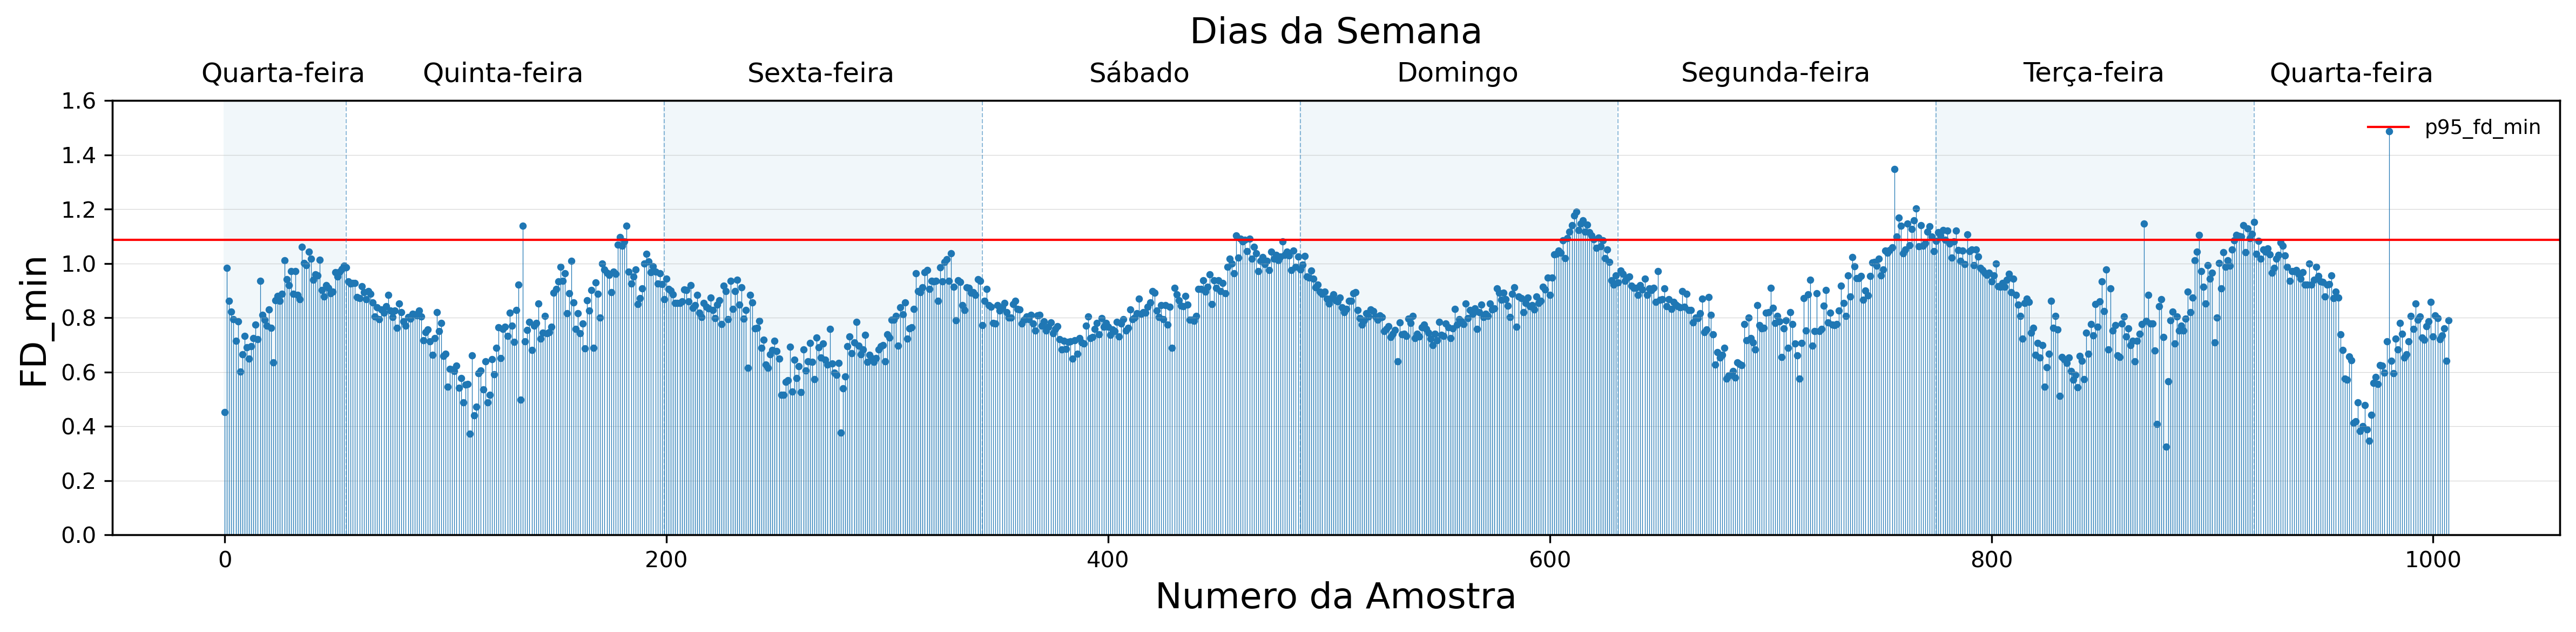

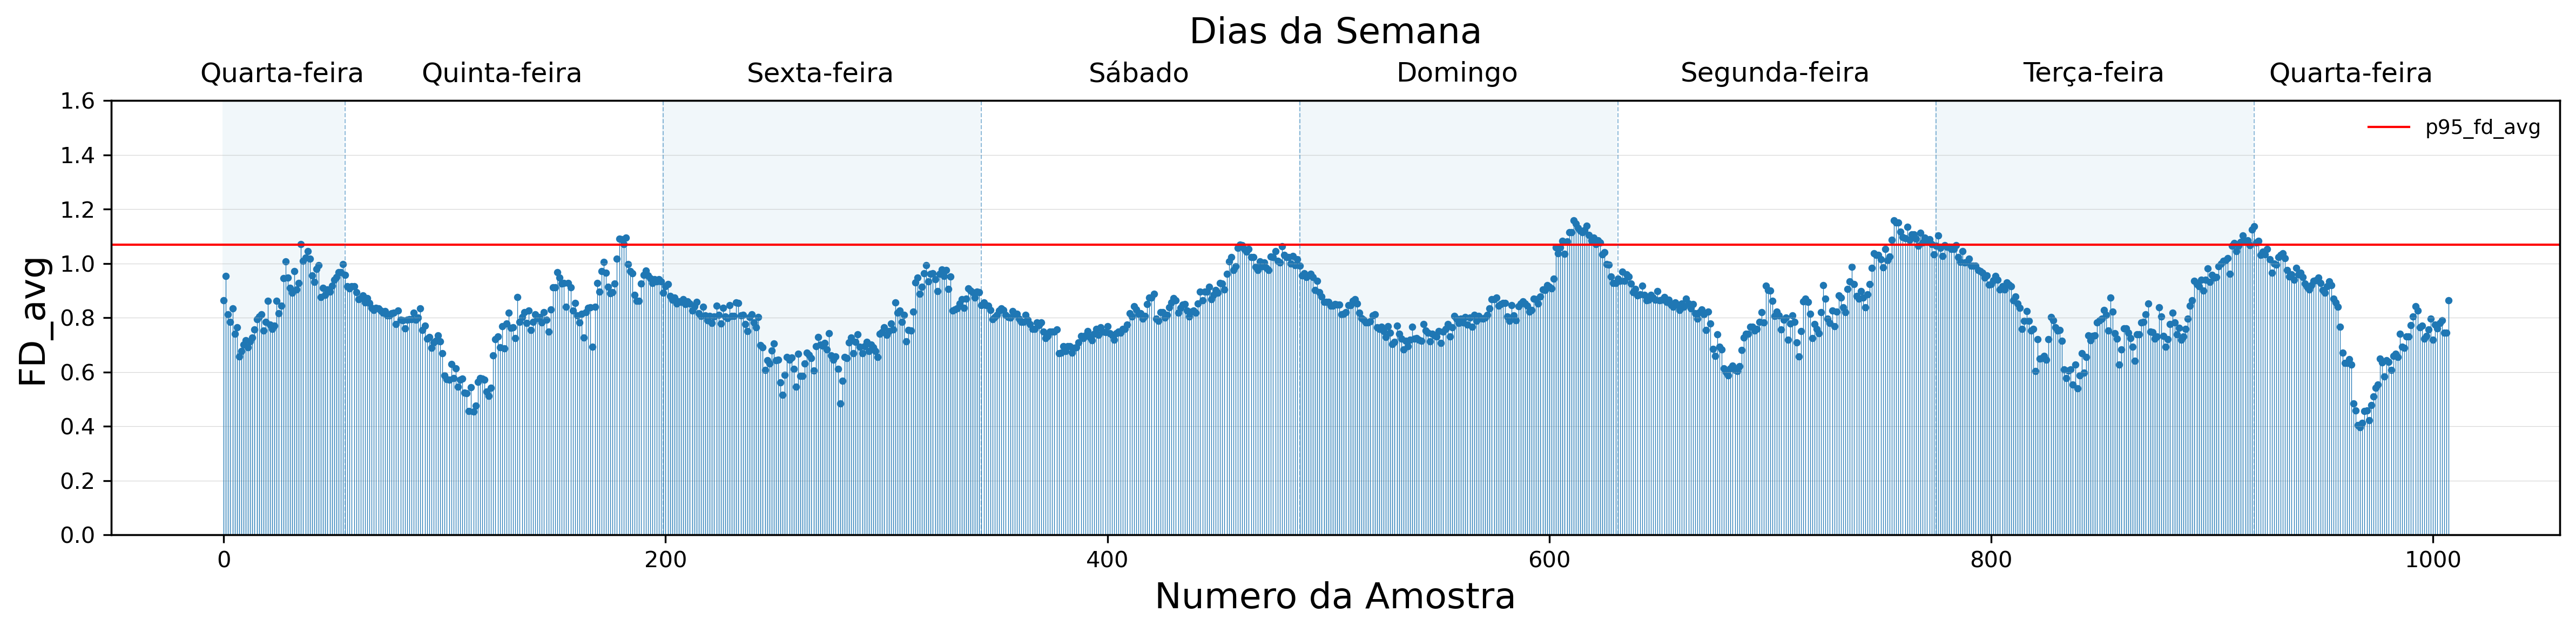

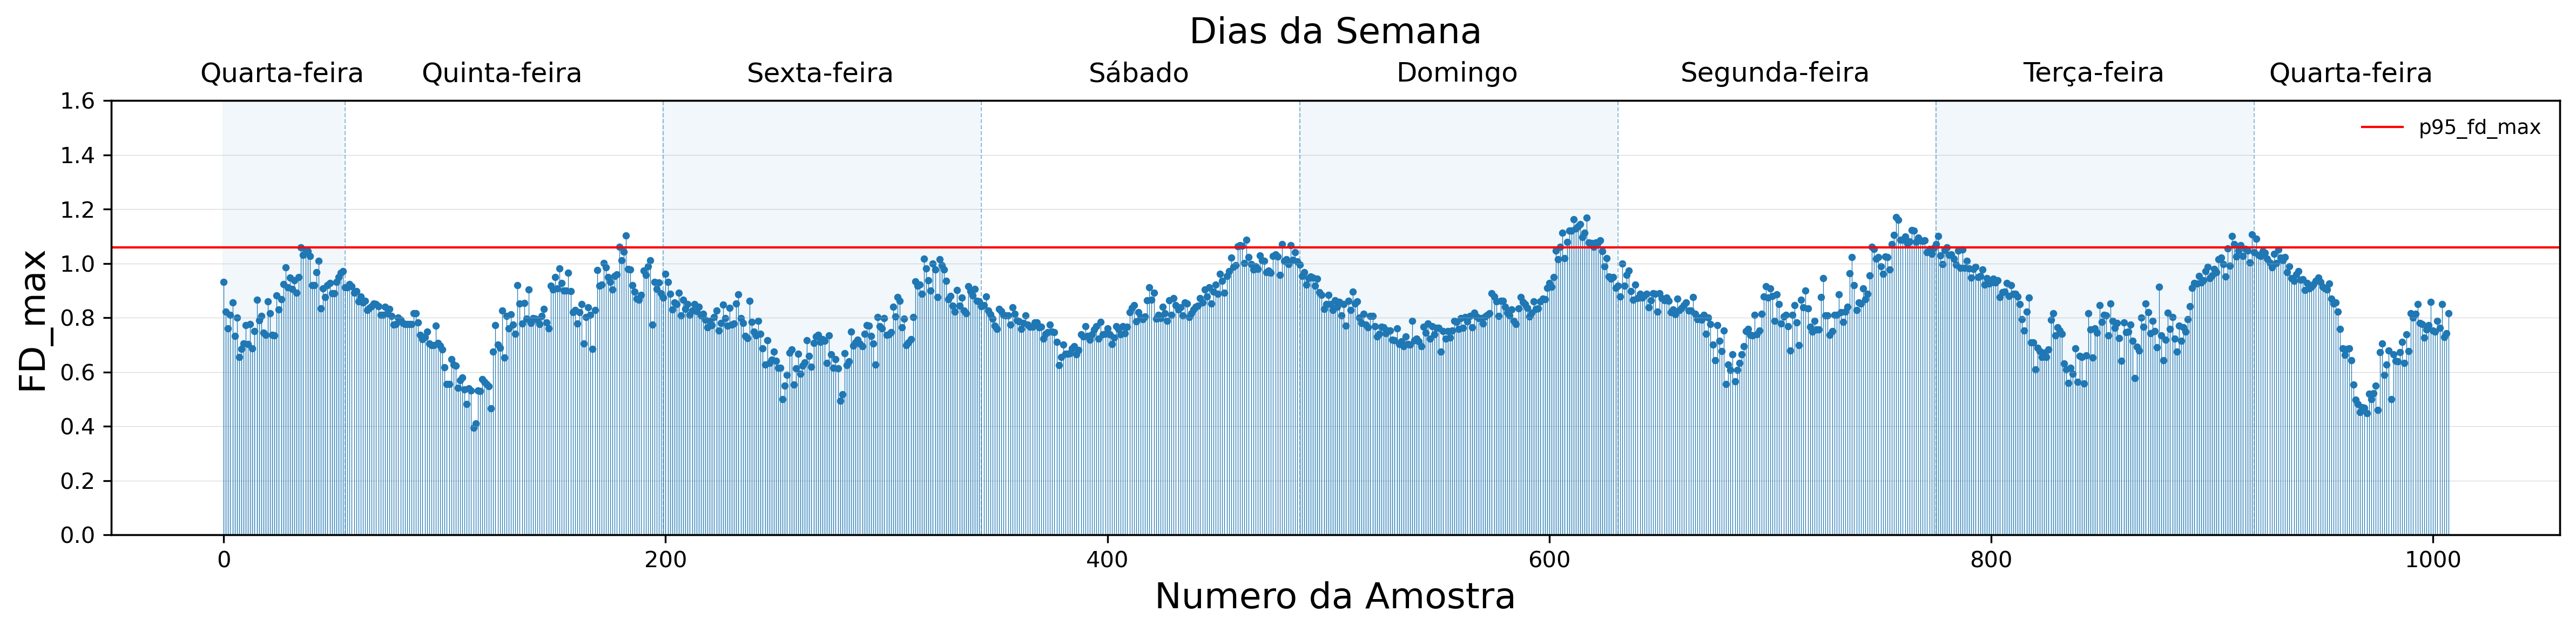

In [16]:
fig = plot_lollipop(dados_DT, 'FD_min', 'Dia_Semana_PT_BR', linha_const_valor=p95_fd_min, linha_const_nome="p95_fd_min")
fig = plot_lollipop(dados_DT, 'FD_avg', 'Dia_Semana_PT_BR', linha_const_valor=p95_fd_avg, linha_const_nome="p95_fd_avg")
fig = plot_lollipop(dados_DT, 'FD_max', 'Dia_Semana_PT_BR', linha_const_valor=p95_fd_max, linha_const_nome="p95_fd_max")
plt.show()

# Gráficos Pizza

In [17]:
def criar_grafico_pizza_tipo_hora(df, coluna, coluna_flag, valor_limite, quadro=''):
    # Cria/atualiza coluna Flag
    df[coluna_flag] = np.where(df[coluna] > valor_limite, 1, 0)

    mask = df[coluna_flag].eq(1)

    # Conta ocorrências por Tipo_Hora (mantendo NaN se houver)
    counts = df.loc[mask, "Tipo_Hora"].value_counts(dropna=False).sort_index()

    if counts.sum() == 0:
        print(f"Não há registros com {coluna} > {valor_limite} para plotar.")
        return

    valores = counts.values
    total = valores.sum()

    # Oculta rótulo quando valor é zero
    rotulos = [str(lbl) if v > 0 else '' for lbl, v in zip(counts.index.astype(str), valores)]

    # Oculta "0.0%" quando o valor absoluto é 0
    def _autopct(pct):
        absoluto = pct * total / 100.0
        return "" if absoluto <= 0 else f"{pct:.1f}%"

    fig, ax = plt.subplots()
    ax.pie(
        valores,
        labels=rotulos,
        autopct=_autopct,
        startangle=90
    )
    ax.set_title(f"{coluna} > {valor_limite} por horário do dia")
    ax.axis("equal")  # pizza circular

    # opcional: exibir na tela (pode comentar se não quiser exibir ao criar)
    # plt.show()

    if quadro:
        nome = f"{quadro}_{coluna}_limite{valor_limite}_grafico_pizza_tipo_hora.png"
        fig.savefig(nome, dpi=300, bbox_inches="tight")

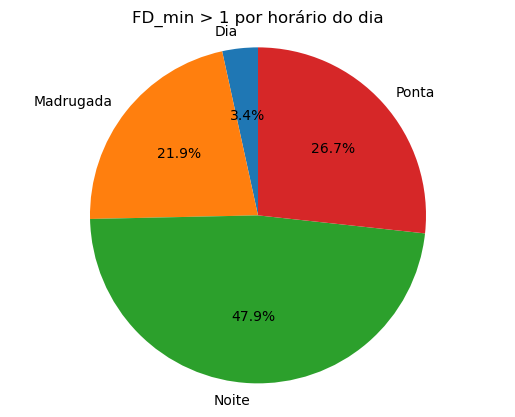

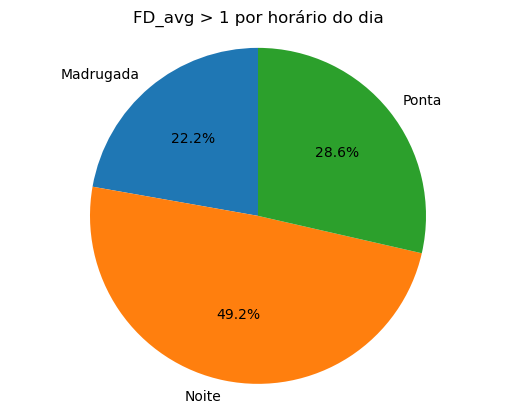

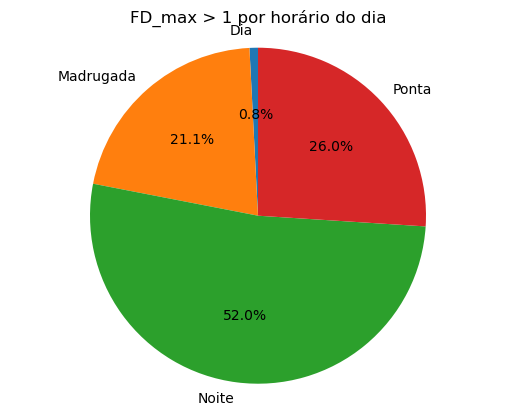

In [18]:
criar_grafico_pizza_tipo_hora(dados_DT, 'FD_min', 'flag_FD_min', 1, quadro)
criar_grafico_pizza_tipo_hora(dados_DT, 'FD_avg', 'flag_FD_avg', 1, quadro)
criar_grafico_pizza_tipo_hora(dados_DT, 'FD_max', 'flag_FD_max', 1, quadro)

In [19]:
def criar_grafico_pizza_dia_semana(df, coluna, coluna_flag, valor_limite, quadro=''):
    # ordem desejada (PT-BR)
    ordem = [
        "Segunda-feira", "Terça-feira", "Quarta-feira",
        "Quinta-feira", "Sexta-feira", "Sábado", "Domingo"
    ]

    # Cria/atualiza coluna Flag
    df[coluna_flag] = np.where(df[coluna] > valor_limite, 1, 0)

    # Filtra os registros com flag == 1
    mask = df[coluna_flag].eq(1)

    # Converte para categórico ordenado e conta
    s = df.loc[mask, "Dia_Semana_PT_BR"].astype(
        pd.CategoricalDtype(categories=ordem, ordered=True)
    )
    counts = s.value_counts(dropna=False, sort=False)

    if counts.sum() == 0:
        print(f"Não há registros com {coluna} > {valor_limite} para plotar.")
        return

    # Valores e rótulos, ocultando o índice quando o valor é zero
    valores = counts.values
    rotulos = [str(lbl) if v > 0 else '' for lbl, v in zip(counts.index.astype(str), valores)]

    # Função autopct que oculta "0.0%" (quando valor absoluto é 0)
    total = valores.sum()
    def _autopct(pct):
        # calcula o valor absoluto correspondente a pct
        absoluto = pct * total / 100.0
        return "" if absoluto <= 0 else f"{pct:.1f}%"

    fig, ax = plt.subplots()
    ax.pie(
        valores,
        labels=rotulos,
        autopct=_autopct,
        startangle=90
    )
    ax.set_title(f"{coluna} > {valor_limite} por Dia da Semana")
    ax.axis("equal")  # pizza circular

    if quadro:
        nome = f"{quadro}_{coluna}_limite{valor_limite}_grafico_pizza_dia_semana.png"
        fig.savefig(nome, dpi=300, bbox_inches="tight")


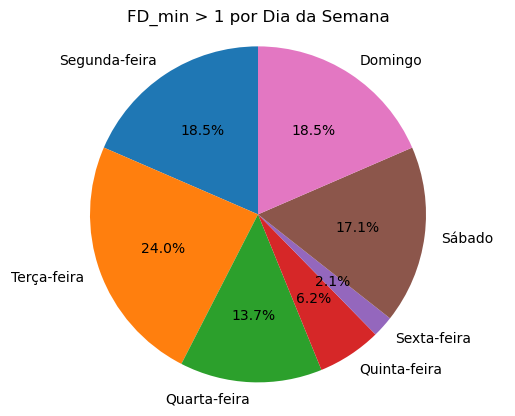

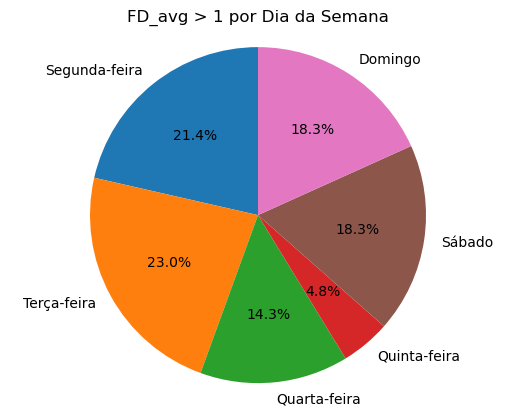

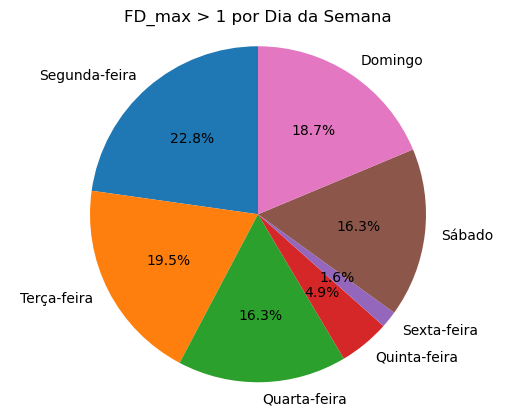

In [20]:
criar_grafico_pizza_dia_semana(dados_DT, 'FD_min', 'flag_FD_min', 1, quadro)
criar_grafico_pizza_dia_semana(dados_DT, 'FD_avg', 'flag_FD_avg', 1, quadro)
criar_grafico_pizza_dia_semana(dados_DT, 'FD_max', 'flag_FD_max', 1, quadro)